In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy import special as sp

In [2]:
# beta=2.0
Nc=3

In [3]:
def get_matrix( Q, lam, beta ):
    mat = np.matrix( [[sp.ive(k-ell+Q+lam[ell], beta/Nc) for ell in range(Nc)] for k in range(Nc)] )
    return mat

def cF( lam, beta ):
    res = np.linalg.det( get_matrix(0, lam, beta) )
    tmp = res
    for Q in range(1,400):
        res += np.linalg.det( get_matrix(Q, lam, beta) )
        res += np.linalg.det( get_matrix(-Q, lam, beta) )
        
        if abs(res-tmp)<1.0e-15:
            break        
        tmp = res
    return res

In [4]:
lam00 = np.zeros(Nc)
#
lam10 = np.zeros(Nc)
lam10[0] = 1
lam10[1] = 0
#
lam11 = np.zeros(Nc)
lam11[0] = 1
lam11[1] = 1
#
lam20 = np.zeros(Nc)
lam20[0] = 2
lam20[1] = 0
#
lam21 = np.zeros(Nc)
lam21[0] = 2
lam21[1] = 1
#
lam22 = np.zeros(Nc)
lam22[0] = 2
lam22[1] = 2
#
lam30 = np.zeros(Nc)
lam30[0] = 3
lam30[1] = 0
#
lam31 = np.zeros(Nc)
lam31[0] = 3
lam31[1] = 1
#
lam32 = np.zeros(Nc)
lam32[0] = 3
lam32[1] = 2
#
lam33 = np.zeros(Nc)
lam33[0] = 3
lam33[1] = 3

In [5]:
retrU = np.loadtxt( "obs1.050000_5.000000_1.000000_/retrU.dat" )

FileNotFoundError: obs1.050000_5.000000_1.000000_/retrU.dat not found.

In [ ]:
xx = np.arange( 1.0, 4.0, 0.01 )
yy = np.array( [cF( lam10, beta )/cF( lam00, beta ) for beta in xx ] )

In [6]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    'font.size'  : 22
})
plt.rc('font',family='Times New Roman')

In [7]:
diff = retrU.T[1]-np.array( [cF( lam10, beta )/cF( lam00, beta ) for beta in retrU.T[0] ] )

plt.plot( retrU.T[0], diff / retrU.T[2], ls="none", marker="x")

plt.ylim(-3, 3)

plt.xlabel("$\\beta$")
plt.ylabel("(deviation)/(stat. error)")
plt.title("${\\cal O} = {\\rm tr} \,U_p $")

plt.savefig("trUerr.pdf", bbox_inches="tight")

<>:9: SyntaxWarning: invalid escape sequence '\,'
<>:9: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_23022/1183751731.py:9: SyntaxWarning: invalid escape sequence '\,'
  plt.title("${\\cal O} = {\\rm tr} \,U_p $")
/tmp/ipykernel_23022/1183751731.py:9: SyntaxWarning: invalid escape sequence '\,'
  plt.title("${\\cal O} = {\\rm tr} \,U_p $")


NameError: name 'retrU' is not defined

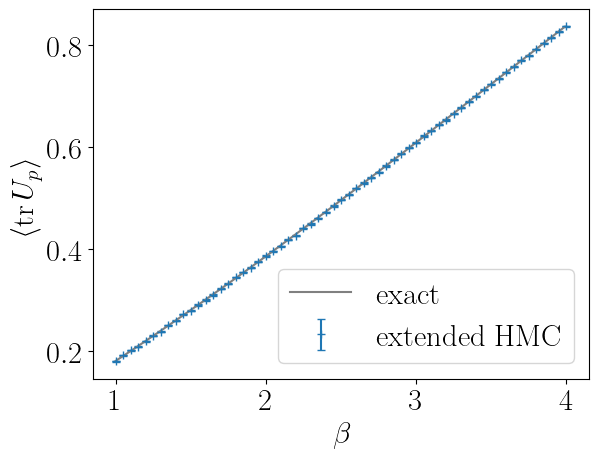

In [170]:
plt.errorbar( retrU.T[0], retrU.T[1], retrU.T[2], 
             ls='none', marker="+",
             capsize=3.0, label="extended HMC")

plt.plot( xx, yy, label="exact", c='gray' )

plt.xlabel("$\\beta$")
plt.ylabel("$\\langle {\\rm tr} \,U_p \\rangle$")
plt.legend(loc="lower right")
# plt.title("$SU(3)$, single plaquette, trivial $G$")

plt.savefig("trU.pdf", bbox_inches="tight")

In [171]:
obs = np.loadtxt( "obs/retrUsq.dat" )

In [172]:
xx = np.arange( 1.0, 4.0, 0.01 )
yy = np.array( [(cF(lam20,beta)+cF(lam11,beta))/cF(lam00,beta) for beta in xx ] )

In [173]:
diff = obs.T[1]-np.array( [(cF(lam20,beta)+cF(lam11,beta))/cF( lam00, beta ) for beta in obs.T[0] ] )

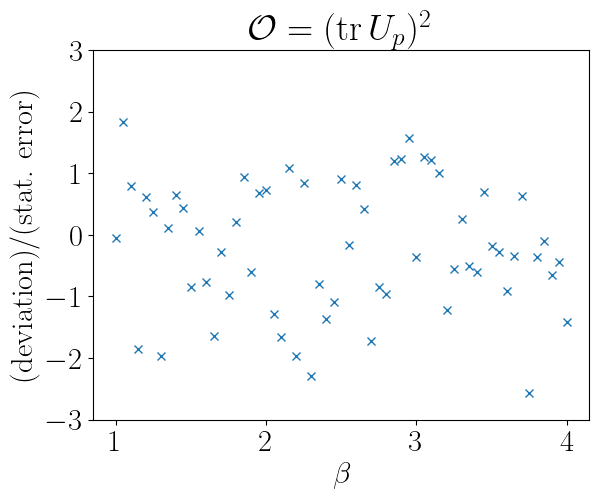

In [174]:
plt.plot( obs.T[0], diff / obs.T[2], ls="none", marker="x")

plt.ylim(-3, 3)

plt.xlabel("$\\beta$")
plt.ylabel("(deviation)/(stat. error)")
plt.title("${\\cal O} = ({\\rm tr} \,U_p)^2 $")
plt.savefig("trUsq_err.pdf", bbox_inches="tight")

In [175]:
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

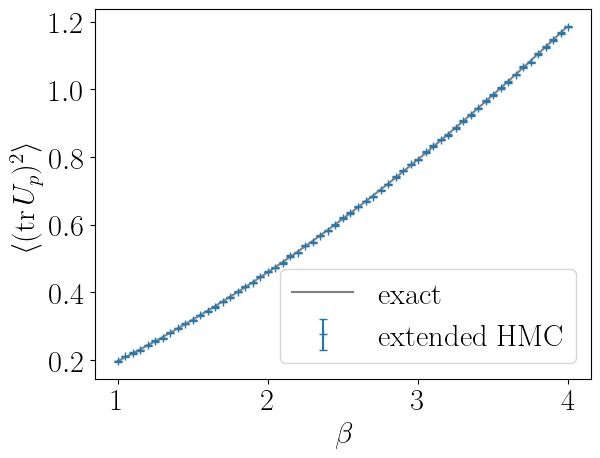

In [176]:
plt.errorbar( obs.T[0], obs.T[1], obs.T[2], 
             ls='none', marker="+",
             capsize=3.0, label="extended HMC")

plt.plot( xx, yy, label="exact", c='gray' )

plt.xlabel("$\\beta$")
plt.ylabel("$\\langle ({\\rm tr} \,U_p)^2 \\rangle$")
plt.legend(loc="lower right")
# plt.title("$SU(3)$, single plaquette, trivial $G$")
plt.savefig("trUsq.pdf", bbox_inches="tight")

In [177]:
obs.T[0]

array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
       1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05,
       2.1 , 2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 ,
       2.65, 2.7 , 2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15,
       3.2 , 3.25, 3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 ,
       3.75, 3.8 , 3.85, 3.9 , 3.95, 4.  ])

In [31]:
obs = np.loadtxt( "obs/retrUtrUdag.dat" )

FileNotFoundError: obs/retrUtrUdag.dat not found.

In [ ]:
xx = np.arange( 0.0, 10.0, 0.01 )
yy = np.array( [1.0+(cF(lam21,beta))/cF(lam00,beta) for beta in xx ] )
yy[0] = 1.0

In [28]:
diff = obs.T[1]-np.array( [cF( lam21, beta )/cF( lam00, beta ) for beta in obs.T[0] ] )

In [29]:
diff

array([0.1657363 , 0.17679175, 0.1834269 , 0.18734623, 0.19941091,
       0.20725472, 0.2116948 , 0.22296637, 0.23189554, 0.23958836,
       0.24553342, 0.25502571, 0.26151551, 0.26799525, 0.27831957,
       0.28511087, 0.29490005])

In [30]:
obs.T[2]

array([0.00147813, 0.00153161, 0.00159414, 0.00160379, 0.00154398,
       0.00176233, 0.00153368, 0.00166665, 0.00158154, 0.00158618,
       0.00163928, 0.0015924 , 0.00182906, 0.00174972, 0.00166484,
       0.00162597, 0.00167241])

Text(0.5, 1.0, '$SU(3)$, single plaquette, trivial $G$')

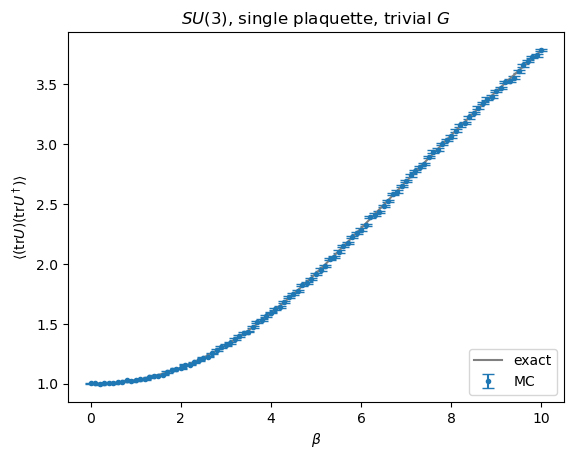

In [14]:
plt.errorbar( obs.T[0], obs.T[1], obs.T[2], 
             ls='none', marker='.',
             capsize=4.0, label="MC")

plt.plot( xx, yy, label="exact", c='gray' )

plt.xlabel("$\\beta$")
plt.ylabel("$\\langle ({\\rm tr} U)({\\rm tr} U^\\dagger) \\rangle$")
plt.legend(loc="lower right")
plt.title("$SU(3)$, single plaquette, trivial $G$")

In [15]:
obs = np.loadtxt( "obs/retrUcub.dat" )

In [16]:
xx = np.arange( 0.0, 10.0, 0.01 )
yy = np.array( [1.0+(cF(lam30,beta)+2.0*cF(lam21,beta))/cF(lam00,beta) for beta in xx ] )
yy[0] = 1.0

Text(0.5, 1.0, '$SU(3)$, single plaquette, trivial $G$')

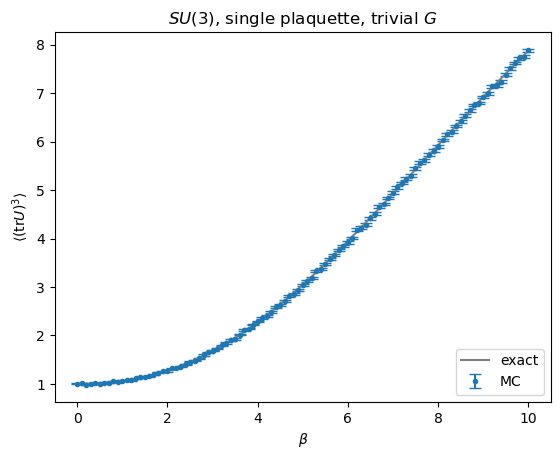

In [17]:
plt.errorbar( obs.T[0], obs.T[1], obs.T[2], 
             ls='none', marker='.',
             capsize=4.0, label="MC")

plt.plot( xx, yy, label="exact", c='gray' )

plt.xlabel("$\\beta$")
plt.ylabel("$\\langle ({\\rm tr} U)^3 \\rangle$")
plt.legend(loc="lower right")
plt.title("$SU(3)$, single plaquette, trivial $G$")

In [18]:
obs = np.loadtxt( "obs/retrUsqtrUdag.dat" )

In [19]:
xx = np.arange( 0.0, 10.0, 0.01 )
yy = np.array( [(cF(lam31,beta)+cF(lam22,beta)+2.0*cF(lam10,beta))/cF(lam00,beta) for beta in xx ] )
yy[0] = 0.0

Text(0.5, 1.0, '$SU(3)$, single plaquette, trivial $G$')

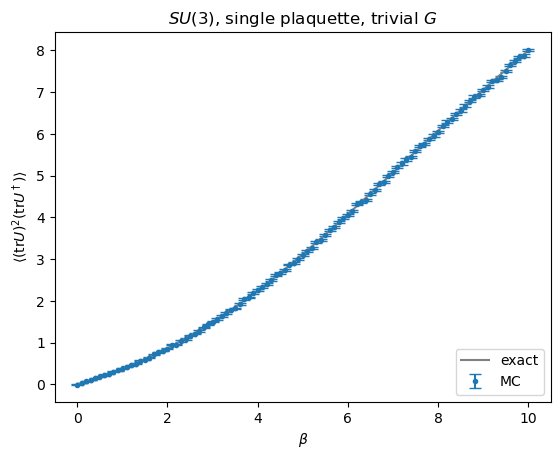

In [20]:
plt.errorbar( obs.T[0], obs.T[1], obs.T[2], 
             ls='none', marker='.',
             capsize=4.0, label="MC")

plt.plot( xx, yy, label="exact", c='gray' )

plt.xlabel("$\\beta$")
plt.ylabel("$\\langle ({\\rm tr} U)^2({\\rm tr} U^\\dagger) \\rangle$")
plt.legend(loc="lower right")
plt.title("$SU(3)$, single plaquette, trivial $G$")

In [23]:
obs.T[2]/obs.T[1]

array([-2.6075089 ,  0.27005388,  0.11852401,  0.08398413,  0.06226002,
        0.04821838,  0.04315647,  0.03782235,  0.03335729,  0.02991805,
        0.02773351,  0.025169  ,  0.02326765,  0.02255121,  0.02025816,
        0.01925655,  0.01831593,  0.01729765,  0.0167415 ,  0.01617259,
        0.01514688,  0.01407267,  0.0146054 ,  0.01340515,  0.01304924,
        0.01271148,  0.0124348 ,  0.01202286,  0.01163117,  0.01116379,
        0.01100095,  0.01078869,  0.01023374,  0.0099171 ,  0.00974788,
        0.00963806,  0.00961968,  0.00923614,  0.00891536,  0.00873276,
        0.00860609,  0.00861875,  0.00855575,  0.0081345 ,  0.00800937,
        0.00778831,  0.00754905,  0.00744742,  0.00753606,  0.00732869,
        0.00714332,  0.00706011,  0.00694416,  0.00681379,  0.00668029,
        0.00655189,  0.00647427,  0.00629297,  0.00621757,  0.00610338,
        0.00601331,  0.00600521,  0.00572956,  0.00566851,  0.0057097 ,
        0.00561816,  0.00543663,  0.00526611,  0.00526978,  0.00